In [1]:
using Random, GMRF

include("src/dataGen.jl");
include("src/cavi.jl");
include("src/mcmc.jl");
include("src/plotting.jl");
include("src/evaluation.jl");

Load previous results

In [2]:
loadFolder = "results/200x200";

res = loadRes(loadFolder);
chain = loadChain(loadFolder);

In [ ]:
M₂ = 5;
M₁ = 5;
M = M₁ * M₂;

**WARNING**: save folder !

In [ ]:
# saveFolder = "results/$(M₁)x$(M₂)";
# saveImgFolder = "results/$(M₁)x$(M₂)/images";

In [37]:
# saveFolder = "results/slow_convergence";
# saveImgFolder = "results/slow_convergence/images";

---

In [7]:
Random.seed!(300);
Fmu = iGMRF(M₁, M₂, 1, 1);
Fphi = iGMRF(M₁, M₂, 1, 10);
gridTarget = generateTargetGrid(Fmu, Fphi);
gridTarget[:, :, 1] = gridTarget[:, :, 1] .+ 40.0;
gridTarget[:, :, 2] = gridTarget[:, :, 2] .+ 1.0;
gridTarget[:, :, 3] = gridTarget[:, :, 3] .+ 0.05;
nobs = 100;
data = generateData(gridTarget, nobs);

In [39]:
nEpochMax = 12;
epochSize = 1;

initialValues = Dict(
    :μ => zeros(M),
    :ϕ => zeros(M),
    :ξ => 0.0,
    :kappaUparam => ((M - 1) / 2 + 1) / .1,
    :kappaVparam => ((M - 1) / 2 + 1) / 1,
);

spatialScheme = Dict(
    :M => M,
    :Fmu => Fmu,
    :Fphi => Fphi,
    :data => data,
);

In [ ]:
include("src/cavi.jl");

res = runCAVI(nEpochMax, epochSize, spatialScheme, initialValues=initialValues, saveFolder=saveFolder);

In [46]:
plotConvergenceCriterion(res.MCKL, saveFolder=saveImgFolder);
plotTraceCAVI(res.traces[:muMean][13, :], "μ13", saveFolder=saveImgFolder);
plotTraceCAVI(res.traces[:phiMean][13, :], "ϕ13", saveFolder=saveImgFolder);
plotTraceCAVI(res.traces[:xiMean], "ξ", saveFolder=saveImgFolder);
trace = res.traces[:kappaUparams][1, :] ./ res.traces[:kappaUparams][2, :];
plotTraceCAVI(trace, "κᵤ", saveFolder=saveImgFolder);
trace = res.traces[:kappaVparams][1, :] ./ res.traces[:kappaVparams][2, :];
plotTraceCAVI(trace, "κᵥ", saveFolder=saveImgFolder);

# MCMC

In [25]:
datastructure = Dict(
    :Y => data,
    :Fmu => Fmu,
    :Fphi => Fphi,
);

niter = 10000;

initialvalues = Dict(
    :μ => zeros(M),
    :ϕ => zeros(M),
    :ξ => .1,
    :κᵤ => .1,
    :κᵥ => .1,
);

stepsize = Dict(
    :μ => 1.3,
    :ϕ => .4,
    :ξ => .002,
);

In [ ]:
include("src/mcmc.jl")

chain = mcmc(datastructure, niter, initialvalues, stepsize, saveFolder=saveFolder);

In [ ]:
changerate(chain)

In [28]:
plotTraceMCMC(chain, "ξ", saveFolder=saveImgFolder);

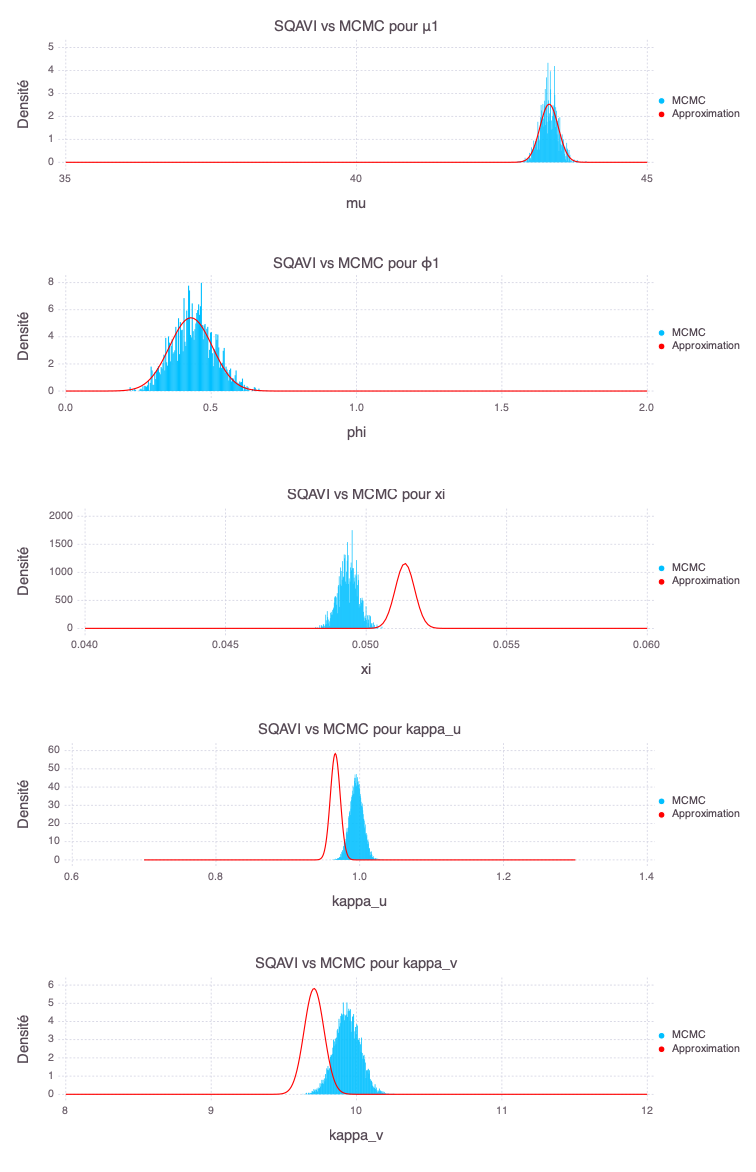

In [4]:
include("src/plotting.jl");

plotCAVIvsMCMC(1, caviRes=res, mcmcChain=chain, warmingSize=1000) #, saveFolder=saveImgFolder);

In [9]:
compDistance(res.traces, gridTarget)

54.23367576545461

In [10]:
compDistance(chain, gridTarget, 1000)

54.19370856067864